<h2> Modules

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

<h2> Functions

<h3> Data Description

In [210]:
def describe_datos(df):
  unicos =[]
  for col in df:
    unicos.append(df[col].unique())
  unicos = pd.Series(unicos, index=df.columns)
  descripcion = pd.concat([df.dtypes, len(df)-df.isna().sum(),df.nunique(),unicos], axis=1)
  descripcion.columns = ['dtypes', 'not-null','nunique','unique' ]
  return(descripcion)

<h3> Correlation Function

In [211]:
def correlacion(dataframe, grafica=True, matrix=False):
    '''Devuelve la matriz de correlación de un dataframe
    y sí grafica=True, muestra un mapa de calor de la matriz de correlación'''
    corr=dataframe.corr()                   
    if grafica==True:
      fig = plt.figure(figsize = (25, 20))
      ax = sns.heatmap(corr,
                       vmin = -1,
                       vmax = 1,
                       center = 0,
                       cmap = "coolwarm", 
                       annot = True,
                       fmt=".2f",
                       square = True)
      ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation = 45,
                         horizontalalignment ='right')
    if matrix==True:
      return corr

<h3> Train-Test Plot Function

In [212]:
def get_bounds(x, y, buffer=0.1):
    minval = np.nanmin(np.concatenate([x, y]))
    maxval = np.nanmax(np.concatenate([x, y]))
    minval -= buffer * minval
    maxval += buffer * minval
    return [minval, maxval]


def compare_pred_results(
    y_train,
    y_train_pred,
    y_test,
    y_test_pred,
    scale_factor=1,
    title="Predicted vs. Actual House Price",
    xlabel="Actual House Price",
    ylabel="Predicted House Price",
):

    y_train = y_train.copy() / scale_factor
    y_train_pred = y_train_pred.copy() / scale_factor
    y_test = y_test.copy() / scale_factor
    y_test_pred = y_test_pred.copy() / scale_factor

    fig, ax = plt.subplots(figsize=(6, 6))

    ax.scatter(y_train, y_train_pred, label="Train", color="#4c72b0")
    ax.scatter(y_test, y_test_pred, label="Test", color="#dd8452")

    bounds = get_bounds(y_test_pred, y_test)
    # trend = np.polyfit(y_train_pred, y_train, 1)
    # y_hat = np.poly1d(trend)
    # y_space = np.linspace(bounds[0], bounds[1], 100)
    plt.plot(bounds, bounds, "k")
    # ax.plot(y_space, y_hat(y_space), "k--", lw=1)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    ax.legend(fontsize=12)
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    ax.set_aspect("equal")


<h3> Histograms Plot Function

In [213]:
def histograms(y1, y2):
    errors = (np.array(y1)- y2)
    media = np.mean(y1 - y2)           
    des_est = np.sqrt(np.var(y1 - y2))
    empirical_errors = np.random.choice(errors, 660)
    teorical_errors = np.random.normal(media, des_est, 660)
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey='all')
    for dat, subplot in zip((teorical_errors, empirical_errors), ax.flatten()):
        sns.histplot(x=dat, ax=subplot, kde=True, )    
    plt.show()    

<h3> Stats Functions

In [214]:
def stats(model, y1, y2):
    r2 = r2_score(y1, y2)
    mae =  mean_absolute_error(y1, y2)
    mse = mean_squared_error(y1, y2)
    rmse = np.sqrt(mse)
    print(f"{model[3:]} data: the r2 score is {r2:.3f}, the mae is {mae:.3f}, the mse is {mse:.3f} and the rmse is {rmse:.3f}")
    return [model, r2, mae, mse, rmse]

<h2> Reading Data

In [215]:
data = pd.read_csv('C:\\Users\\conte\\OneDrive\\Escritorio\\Colegio Bourbaki\\Examenes\\Regresion\\house_price.csv')
data.set_index('Id', inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [216]:
data = data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature']) # Features Categoricas que contienen muchos No Aplica se descartan

<h2> Data Exploration

In [217]:
print(list(data.columns), len(data.columns))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Y

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [219]:
data.describe() # Se describen solo data numérica

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [220]:
describe_datos(data) # se describen todos los datos

,dtypes,not-null,nunique,unique
MSSubClass,int64,1460,15,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,..."
MSZoning,object,1460,5,"[RL, RM, C (all), FV, RH]"
LotFrontage,float64,1201,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan..."
LotArea,int64,1460,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,..."
Street,object,1460,2,"[Pave, Grvl]"
...,...,...,...,...
MoSold,int64,1460,12,"[2, 5, 9, 12, 10, 8, 11, 4, 1, 7, 3, 6]"
YrSold,int64,1460,5,"[2008, 2007, 2006, 2009, 2010]"
SaleType,object,1460,9,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ..."
SaleCondition,object,1460,6,"[Normal, Abnorml, Partial, AdjLand, Alloca, Fa..."


SalePrice vs ['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities']


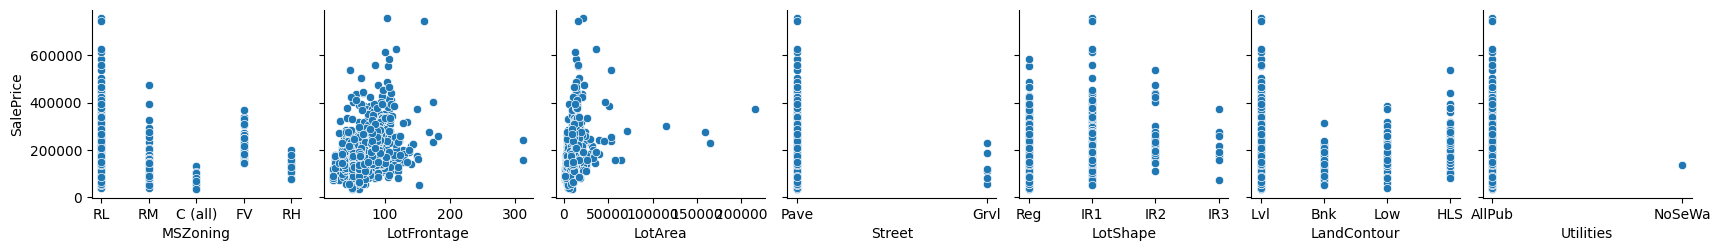

SalePrice vs ['LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle']


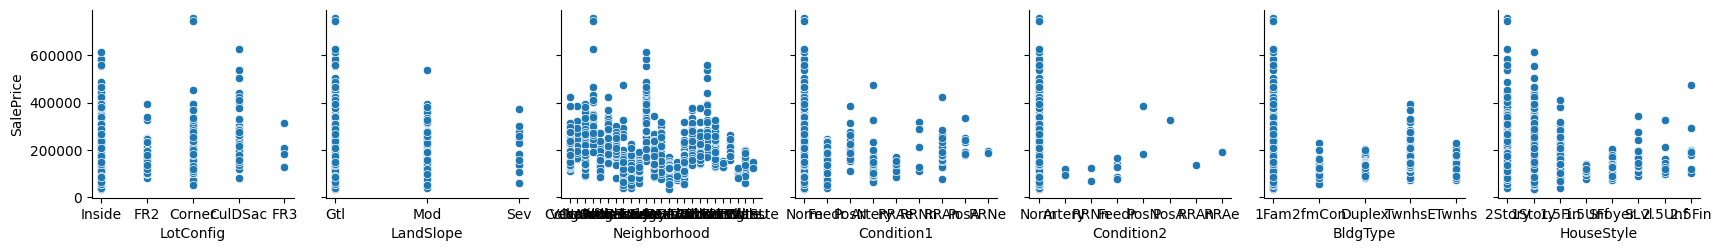

SalePrice vs ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st']


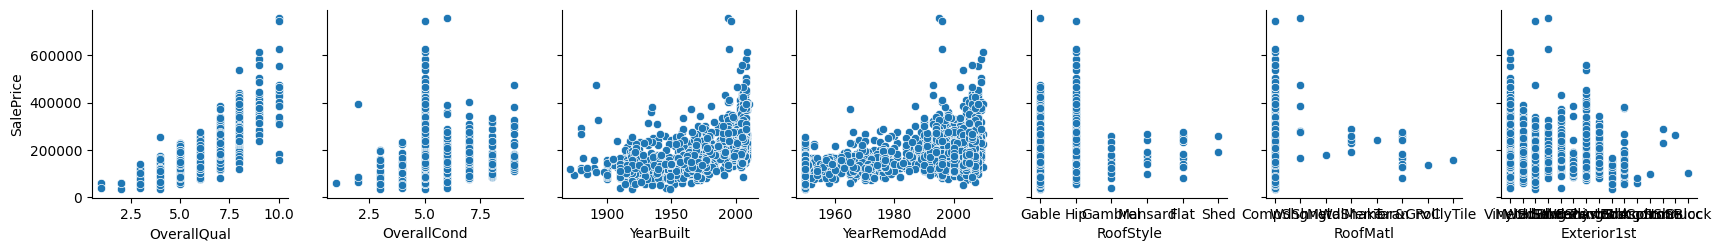

SalePrice vs ['Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']


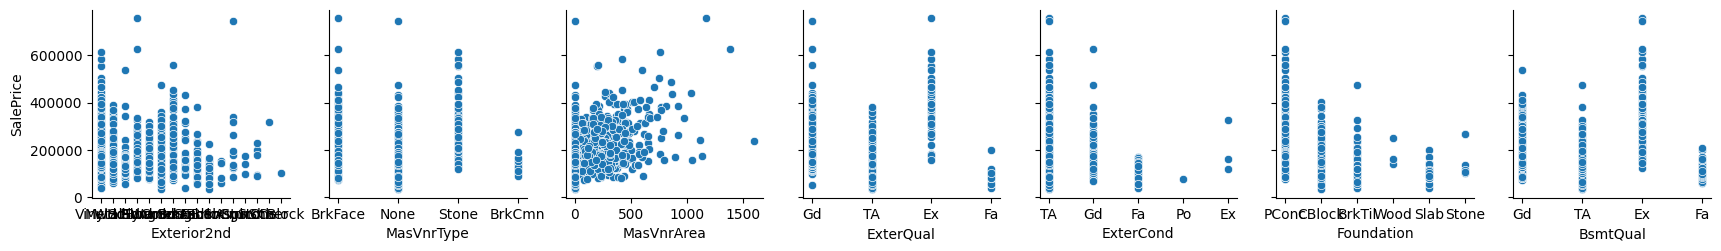

SalePrice vs ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF']


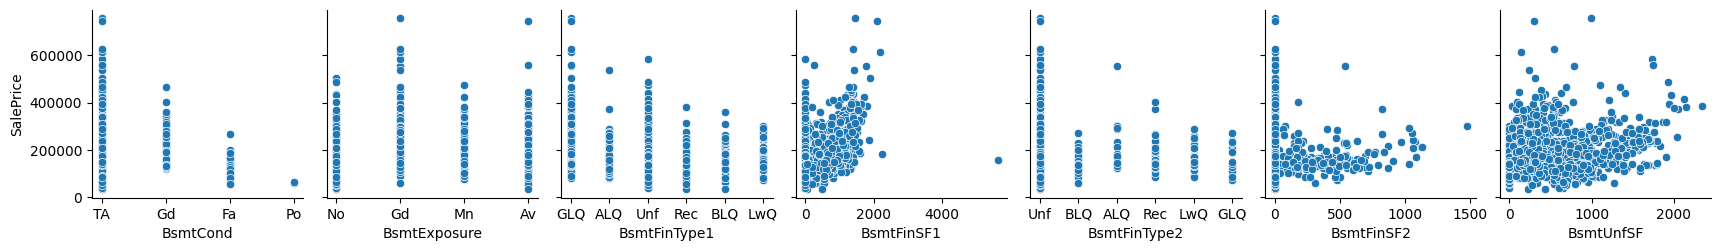

SalePrice vs ['TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF']


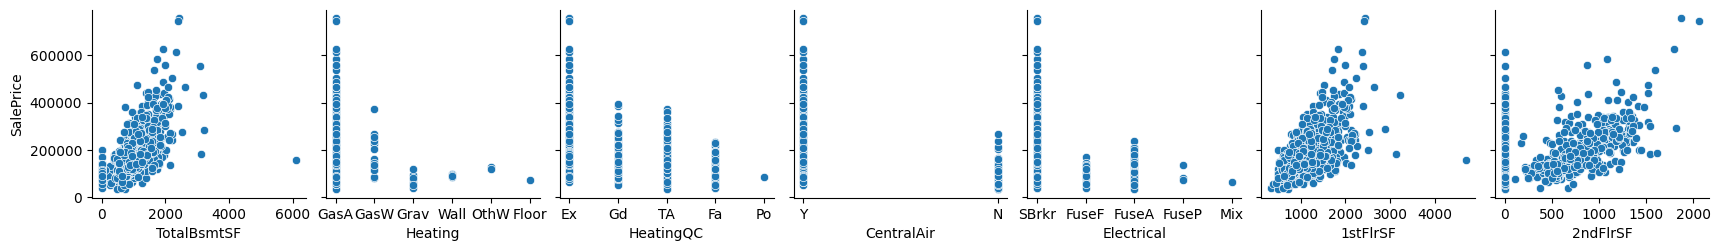

SalePrice vs ['LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr']


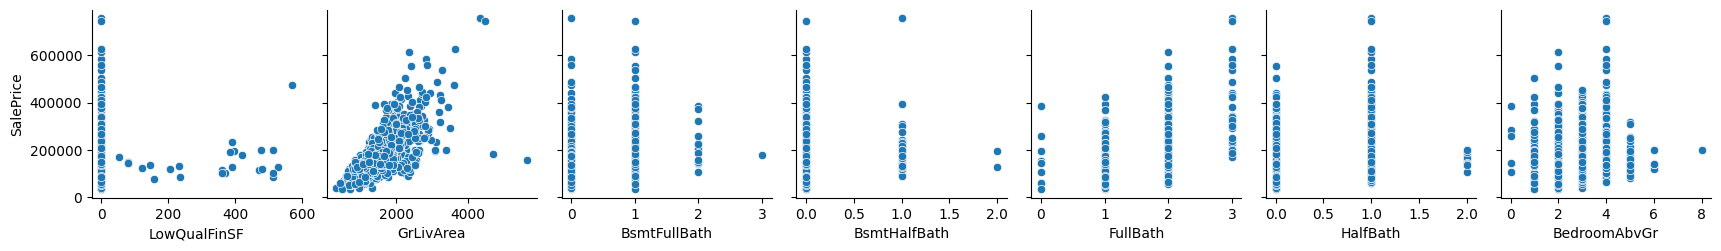

SalePrice vs ['KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType']


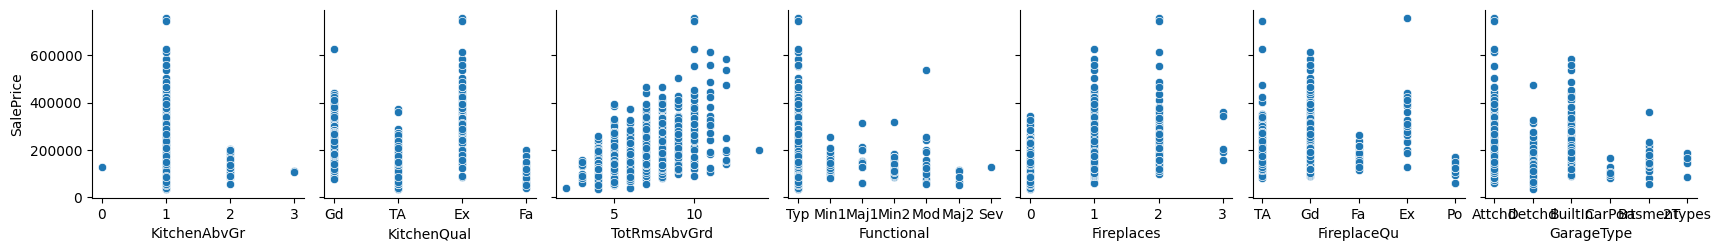

SalePrice vs ['GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive']


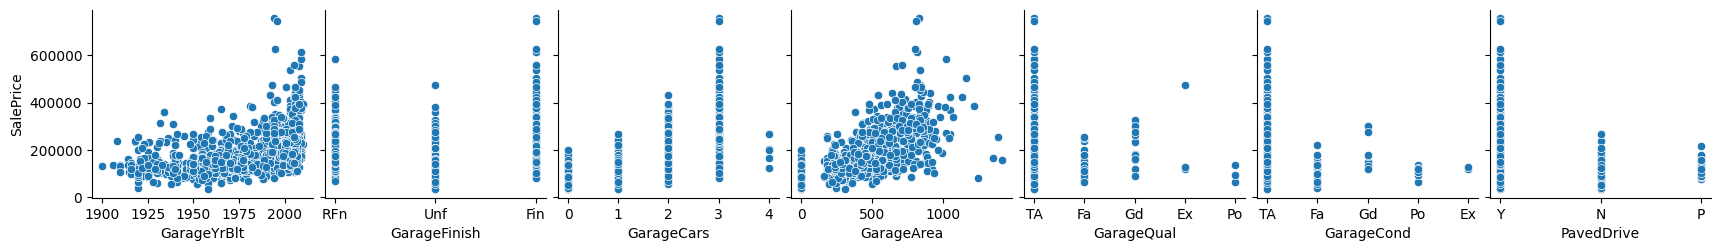

SalePrice vs ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


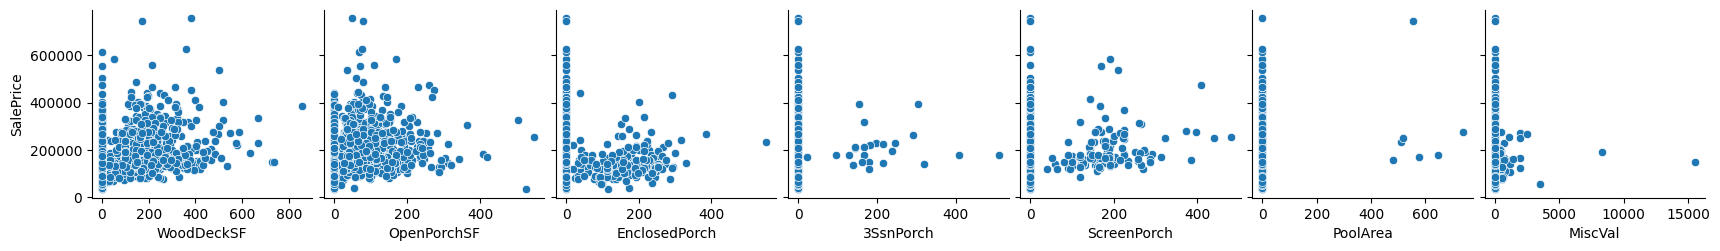

SalePrice vs ['MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


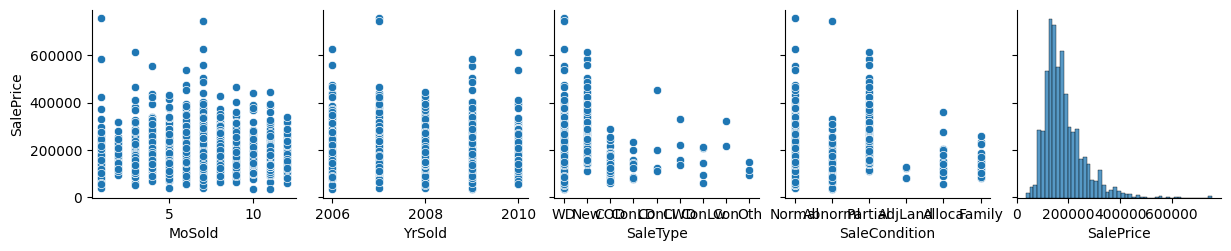

In [221]:
#Se grafican todas las features vs SalePrice

features = list(data.columns)

target = 'SalePrice'

for i in range(1, len(data.columns), 7):
    print(target, 'vs', features[i:i+7])
    sns.pairplot(data, x_vars=features[i:i+7], y_vars=target)
    plt.show()

In [222]:
# Se arma una matriz con las variables categóricas
df_cat = data.select_dtypes(include=['object'])

# NaN Dropping
df_cat=df_cat.drop(columns=['FireplaceQu']) # Muchos NA
df_cat.dropna() # Drop Resto NA

df_cat = pd.get_dummies(df_cat,
                drop_first=True) # One-Hot Enconding para las variables categóricas
                
print(df_cat.shape)
df_cat.head()


(1460, 196)


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [223]:
df_cat.isna().sum().sum() # Se cuentan los valores nulos

0

In [224]:
# Se arma una matriz con las variables numéricas
df_num = data.select_dtypes(exclude=['object'])

print(df_num.shape)
df_num.head()

(1460, 37)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [225]:
# Se hace un merge entre el dataframe categorico y numerico
df = pd.concat([df_num, df_cat], axis=1)
df.shape

(1460, 233)

In [226]:
df.isna().sum().sum() # Se cuentan los valores nulos

348

In [227]:
df = df.fillna(0) # En el caso de las variables numericas se reemplazan por 0

In [228]:
# Se buscan las correlaciones con el target
corr_y = df.corr()['SalePrice']
corr_y.sort_values(ascending = True)

ExterQual_TA       -0.589044
KitchenQual_TA     -0.519298
BsmtQual_TA        -0.452394
GarageFinish_Unf   -0.410608
MasVnrType_None    -0.374468
                      ...   
GarageArea          0.623431
GarageCars          0.640409
GrLivArea           0.708624
OverallQual         0.790982
SalePrice           1.000000
Name: SalePrice, Length: 233, dtype: float64

In [229]:
corr_y.abs().describe()

count    233.000000
mean       0.148697
std        0.165455
min        0.000076
25%        0.037555
50%        0.088623
75%        0.214479
max        1.000000
Name: SalePrice, dtype: float64

In [230]:
# Se descartan las features no relevantes de acuerdo al siguiente critero.
no_relevantes = list(corr_y[corr_y.abs()<0.005].index) 
df = df.drop(no_relevantes, axis=1)
df.shape

(1460, 224)

In [231]:
no_relevantes

['Condition1_RRNe',
 'Condition2_RRAe',
 'BldgType_TwnhsE',
 'RoofStyle_Mansard',
 'RoofMatl_Metal',
 'RoofMatl_Tar&Grv',
 'Foundation_Wood',
 'BsmtFinType2_GLQ',
 'GarageCond_Gd']

In [232]:
# correlacion de las características en el conjunto X
corr_matrix = df.drop('SalePrice', axis=1).corr()  

In [233]:
#Identificar variables redundantes 

# Triangulo superior de la matriz de correlación en números absolutos
celda_sobre_diagonal_ppal = np.triu(np.ones_like(corr_matrix),1).astype(bool)
triangulo_sup = corr_matrix.where(celda_sobre_diagonal_ppal).abs()


# Encontrar las columnas donde la correlación es 1
redundantes = [column for column in triangulo_sup.columns
          if any(triangulo_sup[column] >= .7)]

# Se retiran las variables redundantes
df = df.drop(redundantes, axis=1)

In [234]:
redundantes

['1stFlrSF',
 'TotRmsAbvGrd',
 'GarageArea',
 'MSZoning_RM',
 'Neighborhood_Somerst',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'RoofStyle_Hip',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'MasVnrType_None',
 'ExterQual_TA',
 'ExterCond_TA',
 'Foundation_PConc',
 'BsmtQual_TA',
 'BsmtFinType2_Unf',
 'Heating_GasW',
 'Electrical_Mix',
 'KitchenQual_TA',
 'GarageType_Detchd',
 'GarageQual_TA',
 'GarageCond_TA',
 'SaleType_WD',
 'SaleCondition_Partial']

<h3> Outliers

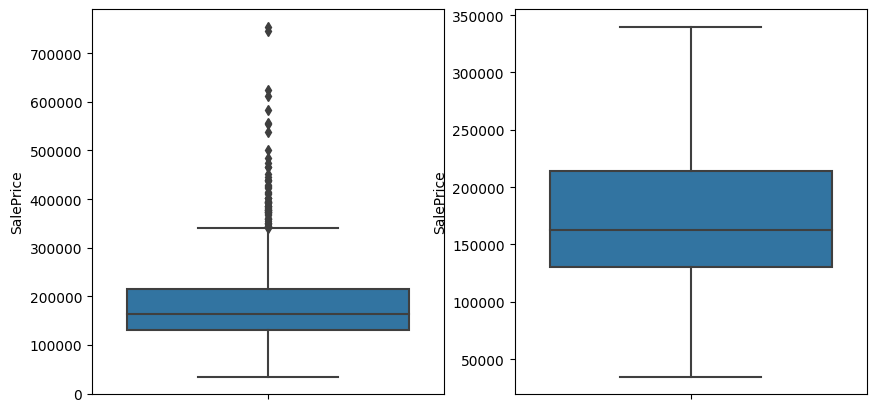

In [235]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for cond, subplot in zip((True, False), ax.flatten()):
  sns.boxplot(y=df['SalePrice'], showfliers=cond, ax= subplot)

In [236]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [237]:
df['SalePrice'].quantile(.975)

384510.7499999999

In [238]:
df['outlier'] = 0
filtro_out = df['SalePrice'] > df['SalePrice'].quantile(.975)
df.loc[filtro_out,'outlier'] = 1

In [239]:
df['outlier'].value_counts()


0    1423
1      37
Name: outlier, dtype: int64

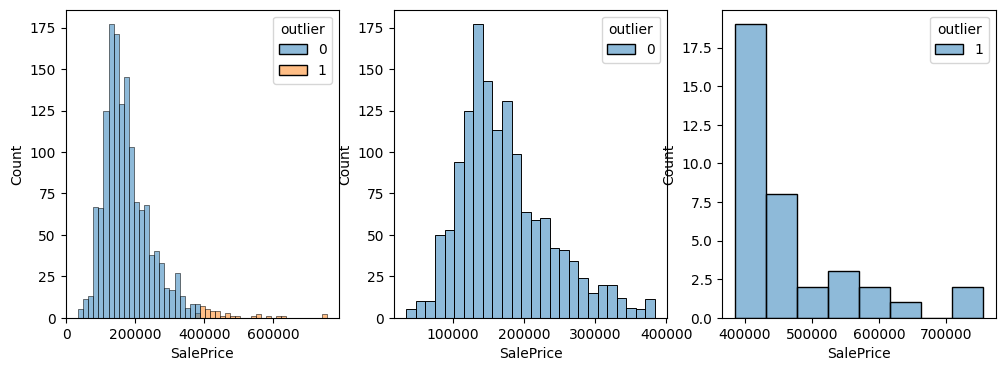

In [240]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for dat, subplot in zip((df, df[-filtro_out], df[filtro_out]), ax.flatten()):
  sns.histplot(x='SalePrice', hue='outlier', 
               data=dat, ax=subplot )
plt.show()

<h4> No parecen outliers, sino valores extremos.

<h2> Model Training

In [241]:
# Se estandarizan los datos
from sklearn.preprocessing import StandardScaler

y = df['SalePrice']
X = df.drop(columns=['SalePrice', 'outlier'])


X_estandarizados= X.copy()
columnas = X.columns

scaler = StandardScaler()

X_estandarizados[columnas] = scaler.fit_transform(X[columnas])

X_train, X_test, y_train, y_test = train_test_split(X_estandarizados, y, test_size=0.3, 
                                                    shuffle=True, random_state=50)

<h2> Linear Regression

In [242]:
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [243]:
lr_train_data = stats('LR Train', y_train, y_train_pred)
lr_test_data = stats('LR Test', y_test, y_test_pred)

Train data: the r2 score is 0.904, the mae is 15942.520, the mse is 629151469.224 and the rmse is 25082.892
Test data: the r2 score is 0.832, the mae is 20455.706, the mse is 970789937.325 and the rmse is 31157.502


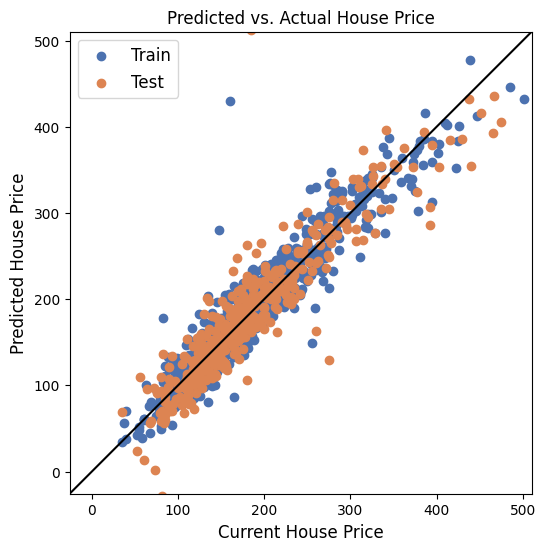

In [244]:
compare_pred_results(y_train, y_train_pred, y_test, y_test_pred, scale_factor=1e3, title="Predicted vs. Actual House Price",
                     xlabel="Current House Price", ylabel="Predicted House Price")

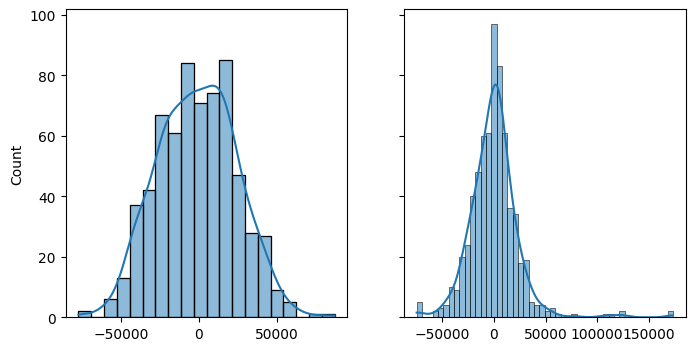

In [245]:
histograms(y_train, y_train_pred)

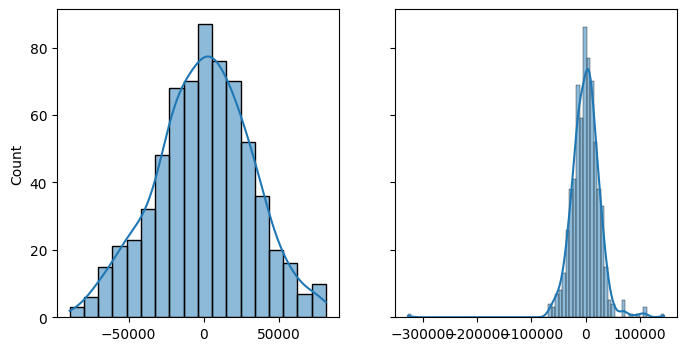

In [246]:
histograms(y_test, y_test_pred)

<h2> Huber Regression

In [247]:
hr = HuberRegressor(epsilon=1.35,   max_iter=1000,  alpha=0,  warm_start=False, 
                    fit_intercept=True, tol=1e-05)

hr = hr.fit(X_train, y_train)

y_pred = hr.predict(X_test)

y_train_pred = hr.predict(X_train)
y_test_pred = hr.predict(X_test)

In [248]:
hr_train_data = stats('HR Train', y_train, y_train_pred)
hr_test_data = stats('HR Test', y_test, y_test_pred)

Train data: the r2 score is 0.870, the mae is 13300.772, the mse is 848995719.192 and the rmse is 29137.531
Test data: the r2 score is 0.809, the mae is 19201.770, the mse is 1105640352.798 and the rmse is 33251.171


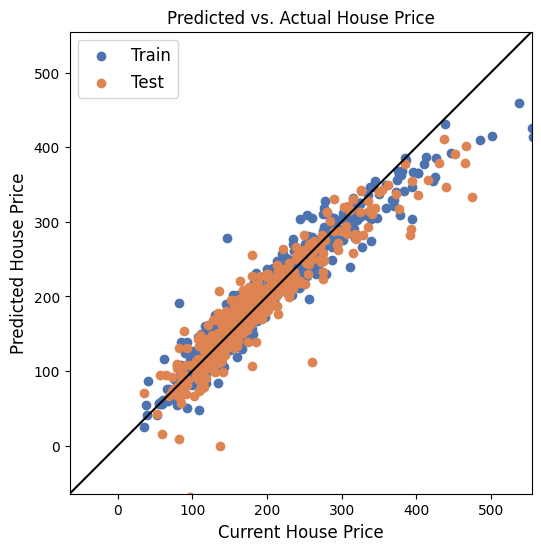

In [249]:
compare_pred_results(y_train, y_train_pred, y_test, y_test_pred, scale_factor=1e3, title="Predicted vs. Actual House Price",
                     xlabel="Current House Price", ylabel="Predicted House Price")

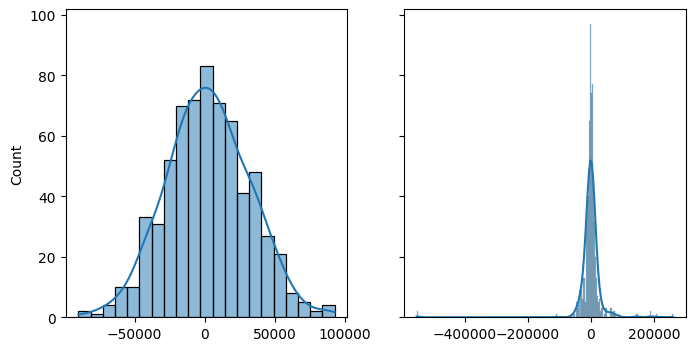

In [250]:
histograms(y_train, y_train_pred)

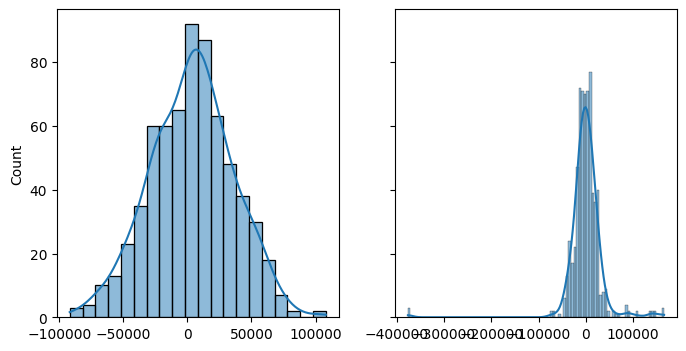

In [251]:
histograms(y_test, y_test_pred)

<h2> Polynomial Regression

In [252]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_estandarizados)


In [253]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, 
                                                    test_size=0.3, 
                                                    shuffle=True,
                                                    )

In [254]:
lr_poly = LinearRegression().fit(X_train, y_train)

y_pred = lr_poly.predict(X_test)

y_train_pred = lr_poly.predict(X_train)
y_test_pred = lr_poly.predict(X_test)

In [255]:
poly_train_data = stats('PR Train', y_train, y_train_pred)
poly_test_data = stats('PR Test', y_test, y_test_pred)

Train data: the r2 score is 1.000, the mae is 0.000, the mse is 0.000 and the rmse is 0.000
Test data: the r2 score is 0.331, the mae is 27069.501, the mse is 3790794684.028 and the rmse is 61569.430


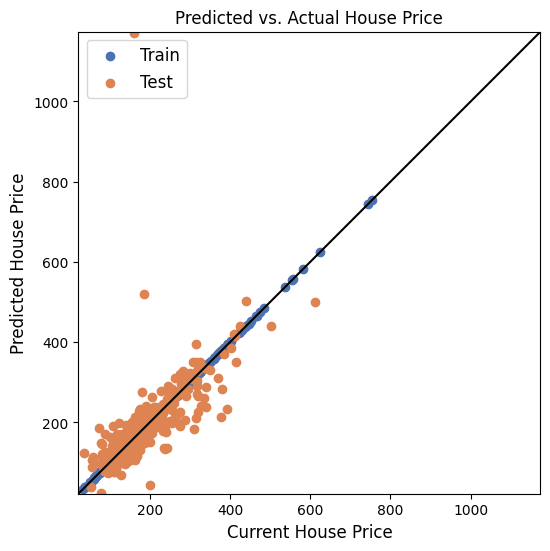

In [256]:
compare_pred_results(y_train, y_train_pred, y_test, y_test_pred, scale_factor=1e3, title="Predicted vs. Actual House Price",
                     xlabel="Current House Price", ylabel="Predicted House Price")

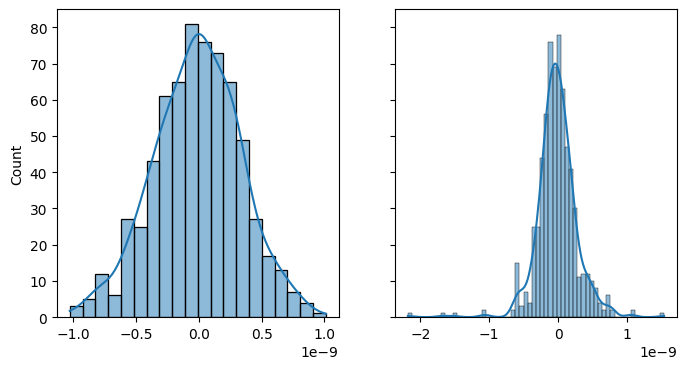

In [257]:
histograms(y_train, y_train_pred)

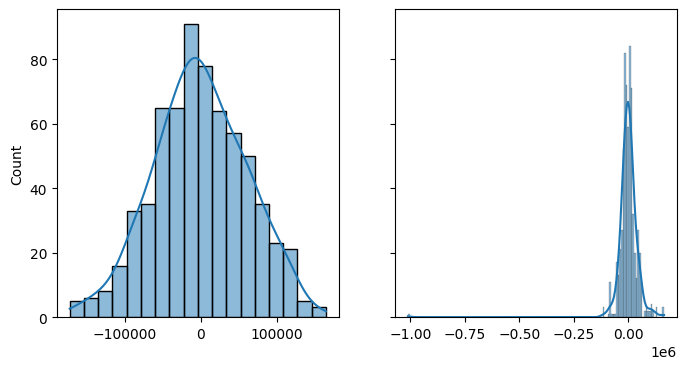

In [258]:
histograms(y_test, y_test_pred)

<h2> Regression Benchmarking

In [259]:
model_list = [lr_train_data, lr_test_data, hr_train_data, hr_test_data, poly_train_data, poly_test_data]

df_model = pd.DataFrame(columns=['Model','R2','MAE', 'MSE', 'RMSE'])

for key, model in enumerate(model_list):
      df_model.loc[key] = model

df_model.round(3)


,Model,R2,MAE,MSE,RMSE
0,LR Train,0.904,15942.520,6.291515e+08,25082.892
1,LR Test,0.832,20455.706,9.707899e+08,31157.502
2,HR Train,0.870,13300.772,8.489957e+08,29137.531
3,HR Test,0.809,19201.770,1.105640e+09,33251.171
4,PR Train,1.000,0.000,0.000000e+00,0.000
5,PR Test,0.331,27069.501,3.790795e+09,61569.430


In [260]:
df_model.set_index('Model', inplace=True)


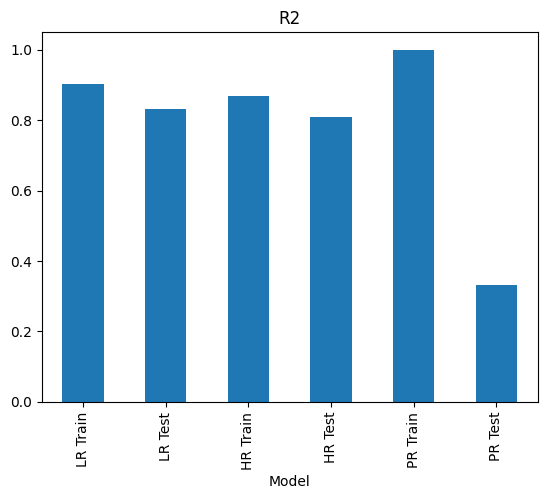

In [261]:
df_model['R2'].plot(kind='bar', title='R2')
plt.show()

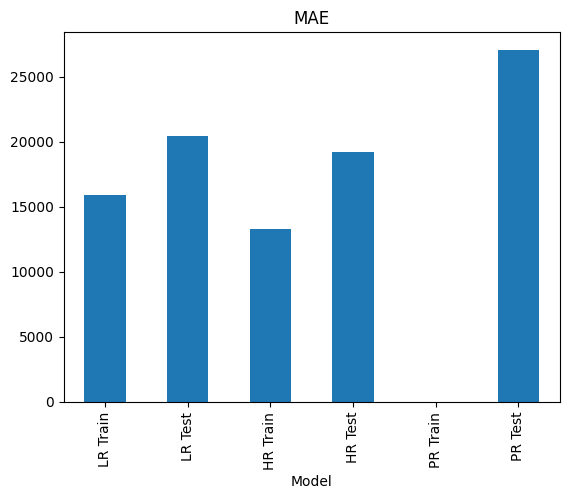

In [262]:
df_model['MAE'].plot(kind='bar', title='MAE')
plt.show()

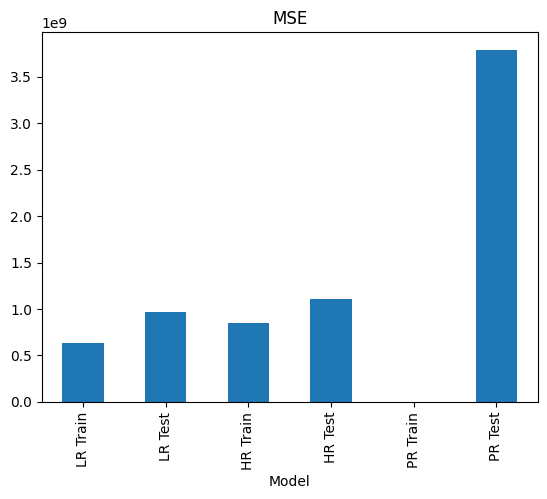

In [263]:
df_model['MSE'].plot(kind='bar', title='MSE')
plt.show()

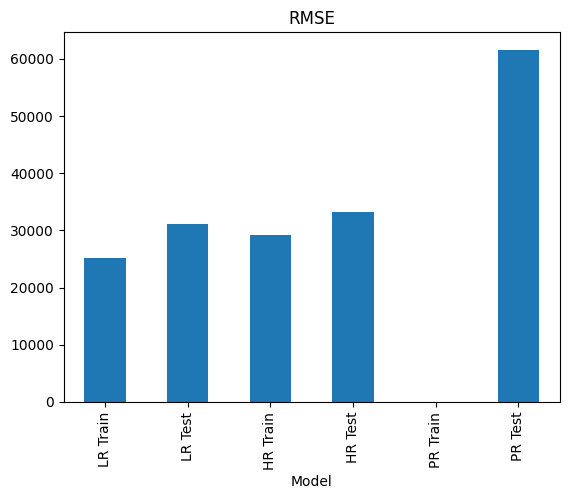

In [264]:
df_model['RMSE'].plot(kind='bar', title='RMSE')
plt.show()